# Apply Lasso on crime data

In [1]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18



In [2]:
crime <- read.table("crime.txt")  # Load crime data

In [3]:
crime <- as.matrix(crime)

In [4]:
X <- crime[, 3:7]  # Explanatory variable

In [5]:
y <- crime[, 1]    # Objective variable

In [6]:
X <- scale(X)      # Standardize explanatory variables

In [7]:
y <- y - mean(y)   # Centralize objective variables

### Lasso estimation

In [8]:
res <- glmnet(x=X, y=y)

### Drawing Solution path

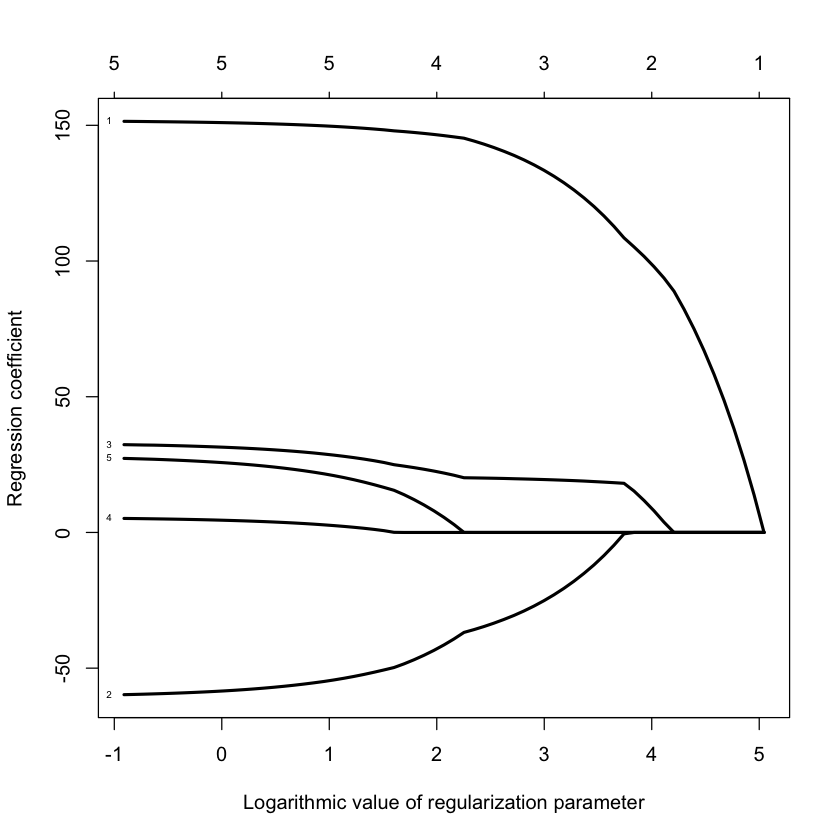

In [9]:
plot(res, xvar="lambda", label=TRUE, xlab="Logarithmic value of regularization parameter", ylab="Regression coefficient", col="black", lwd=2.5) 

### Fix value of regularization parameter to 20

In [10]:
res1 <- glmnet(x=X, y=y, lambda=20) 

In [11]:
res1$beta  # Estimated value of coefficient

5 x 1 sparse Matrix of class "dgCMatrix"
          s0
V3 133.50551
V4 -25.22804
V5  19.45576
V6   .      
V7   .      

### CV calculation

In [12]:
res.cv <- cv.glmnet(x=X, y=y) # CV calculation

### Plot the transition of CV value

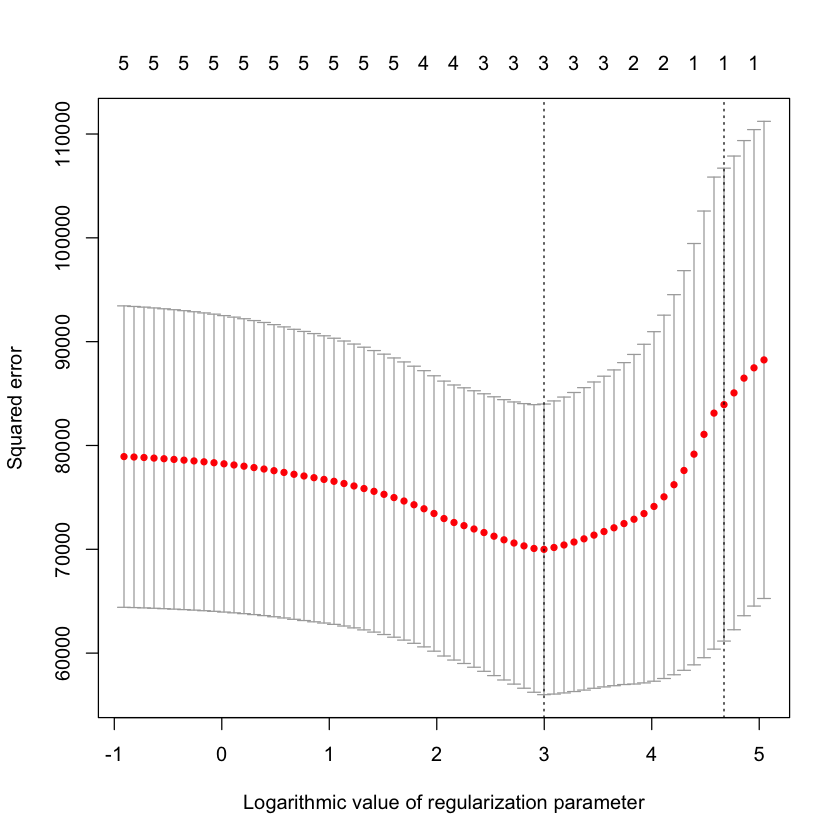

In [13]:
plot(res.cv, xlab="Logarithmic value of regularization parameter", ylab="Squared error")
# Logarithmic value of regularization parameter: 正規化パラメータの対数値，Squared error：誤差2乗値

### Output the regularization parameter value that minimizes the CV value

In [14]:
res.cv$lambda.min

[1] 20.03869

### 1 Output the value of the regularization parameter selected by the standard error rule

In [15]:
res.cv$lambda.1se

[1] 106.9405